<h1>Kmeans Clustering</h1>
<img src="K_means.gif" width="1000" align="center">
With our knowledge of Python and now Numpy lets create an implementation of a famous machine learning algorithm "K-Means Clustering". The job of a clustering algorithm is to break a dataset into some number of "clusters" (groups), the number of clusters usually defined by the user. K-Means clustering works by iteratively updating a pre-defined number of cluster centers. It does this by finding the distance between each datapoint and every cluster center. Datapoints are then assigned to the cluster center they are closest to and each cluster center is updated to be the mean of the new cluster. These steps are repeated for some number of steps or until the cluster centers converge (they stop moving so much).<br>

[For more Information on K-means](https://en.wikipedia.org/wiki/K-means_clustering)<br>

<b>Lets have a look at the steps of K-means clustering</b><br>
1. Define the number of clusters "k" you want to group your data into<br>
2. Randomly initialise k vectors with the same size as each datapoint, this is the initialisation of our cluster centers<br>
3. Calculate the distance between each datapoint and each cluster center (using MSE or equivalent)<br>
4. For every datapoint find the cluster center they are closest to<br>
5. Re-calculate the cluster centers by finding the mean of every new cluster<br>
6. Repeat steps 3-5 for n steps or until convergence

In [1]:
import matplotlib.pyplot as plt
import numpy as np               
import time
from IPython.display import clear_output

#Custom module to deal with downloading the dataset
from load import test_x

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done


<b>Using the module "load" that comes with this notebook, lets load our dataset</b><br>
The dataset we'll be using is the MNIST dataset, a dataset of small, low-res handwritten digits. There are 60000 training images and 10000 test images divided up into 10 classes (digits 0-9). Here we will be using the test set (as it's a smaller set)

In [2]:
#Number of datapoint
num_img = 10000  
#Number of cluster centers, 10 because the dataset contains 10 classes eg: digit 0 to 9
num_means = 10   
#We'll perform this many iterations of the algorithm
iterations = 20 
#Each image is 28*28 pixels, which has been flattened to a vector 0f 784 values
data_size = 28*28
# The images are 8 bit greyscale images (values range from 0-255)
# We'll rescale the pixel values to be between 0-1 (We don't REALLY need to do this for k-means)
test_x = (test_x.astype(float) / 255)

<b>Lets visualise some data!</b>

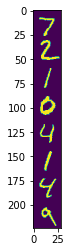

In [3]:
plt.imshow(test_x[0:8].reshape(28*8, 28))

<h3> Kmeans Initialization </h3>
Here we'll initialise the cluster centers to random values by randomly sampling 10 points from the dataset

In [34]:
#Randomly generate K indicies for k datapoints from the dataset (indicies need to be int)
ind  = np.random.randint(0, 10000, (10))
print(ind)
means = test_x[ind]
print(means)

[7084 4295 1122  482 4181 3006 9351 7447 5498 6207]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<h3> Kmeans Algorithm </h3>
Now implement the main steps of the K-Means clustering algorithm! Try and make it as efficient as possible and minimise the time/iteration

In [92]:
labels = range(0, 9)
train_y = np.zeros((10000), dtype=int)
start_time = time.time()
classlen = np.zeros(10, dtype=int)
for i in range(iterations): 
    #Implement a step of k-means clustering by following the steps above
    for idx, image in enumerate(test_x):
        y = ((image-means)**2).mean(1).argmin()
        train_y[idx] = y
        classlen[y] = classlen[y]+1
        means[y] = (means[y]+(image/classlen[y]))/(1+(1/classlen[y]))
        
end_time = time.time()
print("%d iterations took %.2f seconds, which corresponds to %.2fs/iteration" % (iterations, end_time - start_time, (end_time - start_time)/iterations))

20 iterations took 7.45 seconds, which corresponds to 0.37s/iteration


In [98]:
train_y

array([7, 0, 2, ..., 7, 0, 0])

In [97]:
abs((test_x[2223]-means).mean(1)).argmin()

6

In [95]:
train_y.min()

0

<h3>Lets visualise the the cluster centers!</h3>

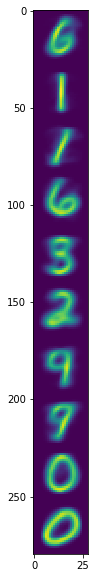

In [96]:
plt.figure(1, figsize=(20, 10))
img = means.reshape(num_means*28,28)
plt.imshow(img)